In [86]:
# identificação
nome1 = 'Flávio Cariel Ferreira'
RA1 = '11202231018'
login1 = 'flavio.f'

nome2 = ''
RA2 = ''
login2 = ''

# Integração numérica

O problema que queremos resolver é o cálculo de integrais definidas:

$$ \int_a^b f(x) dx $$

Isto é um problema muito comum, já que integrais são necessárias para uma infinidade de problemas, e *muitas* (a grande maioria, na verdade) das funções não têm integral analítica, e aí técnicas de integração "manuais" (como as de FUV) não funcionam.

Para isso, vamos lembrar da definição de integral definida: ela é a área (com sinal) sob o gráfico da função $f$, e esta pode ser pensada como o limite de **somas de Riemann**:

$$ \int_a^b f(x) dx = \lim_{n\rightarrow \infty} \sum_{i=1}^n h f(x_i) $$

onde $h = \frac{b-a}{n}$ e os $x_i$ são pontos regularmente espaçados com $x_1 = a$ e $x_{n+1} = b$. Isto é, repartimos o intervalo $[a, b]$ em sub-intervalos, e em cada um desses calculamos a área do retângulo, dada por $h f(x_i)$, e depois somamos todas as áreas. A altura do retângulo pode ser dada pelo valor da $f$ em qualquer ponto do intervalo: se usamos os $x_i$ do início de cada intervalo, chamamos isso de soma de Riemann à esquerda; se usamos os do final de cada intervalo, de soma de Riemann à direita.

Vamos plotar os gráficos e calcular os valores para uma função $f(x) = x \cos{x}$ no intervalo $[0;2]$.

### Exercício 0
Varie o número de intervalos $n$ e veja o que acontece com o gráfico e com os valores das somas de Riemann à esquerda e à direita.

integral "exata": 0.40244801710422107
soma de Riemann à esquerda: 0.5255599339075331
soma de Riemann à direita: 0.19264246466981913


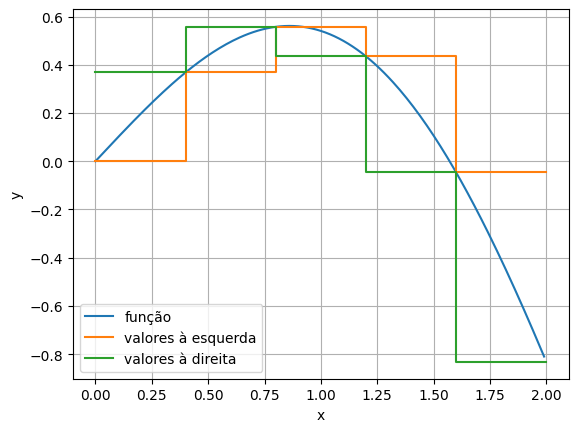

In [87]:
import numpy as np
from matplotlib import pyplot as pt


def f(x):
    return x * np.cos(x)


x = np.arange(0.0, 2.0, 0.01)
y = f(x)

# número de intervalos
# varie este número e veja o que acontece com os plots e com as
# estimativas da integral
n = 5

# np.linspace é parecido com np.arange, mas inclui o ponto final, e o terceiro
# argumento da função é o número de pontos, não o tamanho do intervalo
# repare que n+1 pontos corresponde a n intervalos!
xi = np.linspace(0, 2.0, n + 1)
yi = f(xi)
# jeito espertinho para plotar (precisa guardar cada ponto 2 vezes pra plotar
# a linha reta em cada intervalo).
xi2 = np.c_[xi, xi].flatten()[1:-1]
yi2 = np.c_[yi, yi].flatten()

pt.plot(x, f(x))
pt.plot(xi2, yi2[:-2])
pt.plot(xi2, yi2[2:])
pt.grid()
pt.xlabel('x')
pt.ylabel('y')
pt.legend(['função', 'valores à esquerda', 'valores à direita'])

# comparação dos valores das integrais
# essa integral pode ser calculada analiticamente usando integração por partes
print(f'integral "exata": {-1 + np.cos(2) + 2*np.sin(2)}')
# usando os valores à esquerda:
IE = np.sum(yi[:-1]) * 2 / n
print(f'soma de Riemann à esquerda: {IE}')
# usando os valores à direita:
ID = np.sum(yi[1:]) * 2 / n
print(f'soma de Riemann à direita: {ID}')

## Métodos de integração

Os métodos de integração que estudaremos se baseiam em 2 ideias:

1. Aproximar a função por um polinômio, usando interpolação polinomial
2. Dividir o intervalo de integração em sub-intervalos, e integrar cada um deles.

Vamos inicalmente estudar a abordagem **(1)**, que vai nos levar às chamadas *regras de Newton-Cotes*. A seguir, veremos como combinar essas regras com a abordagem **(2)**, que nos levará aos chamados *métodos compostos*.

## Regras de Newton-Cotes

A ideia aqui é usar um polinômio como aproximação da função no intervalo, e aí usar a integral do polinômio para obter a fórmula de integração de uma forma simples.

Podemos escrever fórmulas usando um número qualquer de pontos, levando a polinômios de graus altos, mas na prática isso não é muito útil, como discutiremos nas próximas aulas. Vamos olhar apenas para polinômios de graus 0, 1 e 2.

### Regra do ponto médio

Aqui vamos aproximar a função por um polinômio de grau zero, ou seja, uma constante. Dada uma função $f$ e um intervalo $[a;b]$, tomamos

$$ f(x) \approx f\left(\frac{a+b}{2}\right) $$

e calculamos

$$ \int_a^b f(x)dx  \approx \int_a^b f\left(\frac{a+b}{2}\right) = (b-a) f\left(\frac{a+b}{2}\right) $$

### Regra do trapézio

Agora vamos aproximar a função por um polinômio de grau um, ou seja, uma reta. A reta é calculada simplesmente ligando os pontos $(a, f(a))$ e $(b, f(b))$, o que leva a um trapézio. Dada uma função $f$ e um intervalo $[a;b]$, podemos usar os polinômios de Lagrange para calcular o polinômio interpolador com $x_1 = a,\ x_2=b$:

$$ f(x) \approx f(a) L_1(x) + f(b) L_2(x) = f(a) \frac{x-b}{a-b} + f(b) \frac{x-a}{b-a} $$

e calculamos a integral:

$$ \begin{aligned}
\int_a^b f(x)dx &\approx \int_a^b f(a) \frac{x-b}{a-b} + \int_a^b f(b) \frac{x-a}{b-a}  \\
&= (b-a)\ \frac{f(a) + f(b)}{2}
\end{aligned}$$

(abra a conta e confira!). Essa expressão não é surpreendente, não é? Afinal, é a fórmula para a área de um trapézio.

### Regra de Simpson

Finalmente vamos aproximar a função por um polinômio de grau 2, ou seja, uma parábola, usando os pontos extremos e o ponto médio do intervalo, ou seja, $x_1 = a,\ x_2 = \bar{x} = \frac{a+b}{2},\ x_3=b$. Então, dada uma função $f$ e um intervalo $[a;b]$, usamos novamente os polinômios de Lagrange para calcular o polinômio interpolador:

$$ \begin{aligned}
f(x) &\approx f(a) L_1(x) + f\left(\frac{a+b}{2}\right)L_2(x) + f(b) L_3(x) \\
&= f(a) \frac{(x-\bar{x})(x-b)}{(a-b)(a-\bar{x})} + f(\bar{x}) \frac{(x-a)(x-b)}{(\bar{x}-a)(\bar{x}-b)} + f(b) \frac{(x-a)(x-\bar{x})}{(b-a)(b-\bar{x})}
\end{aligned}$$

e calculamos a integral:

$$ \begin{aligned}
\int_a^b f(x)dx &\approx \int_a^b f(a) \frac{(x-\bar{x})(x-b)}{(a-b)(a-\bar{x})} + \int_a^b f(\bar{x}) \frac{(x-a)(x-b)}{(\bar{x}-a)(\bar{x}-b)} + \int_a^b f(b) \frac{(x-a)(x-\bar{x})}{(b-a)(b-\bar{x})}  \\
&= \frac{b-a}{2}\left(\frac{1}{3}f(a) + \frac{4}{3} f\left(\frac{a+b}{2}\right) + \frac{1}{3} f(b)\right)
\end{aligned}$$

Esta conta é um tanto mais trabalhosa, mas a expressão final ainda é bastante simples.

### Exercício 1

Calculo a integral $$\int_0^1 x \cos{x} \ dx$$ usando os 3 métodos acima, e compare com o valor da solução exata.

In [88]:
def f(x):
    return x * np.cos(x)


a = 0
b = 1

## solução exata:
Iex = -1 + np.cos(1) + np.sin(1)

# regra do ponto médio
Ipm = (b - a) * f((a + b) / 2)

# regra do trapézio
Itr = (b - a) * ((f(a) + f(b)) / 2)

# regra de Simpson
Isimp = ((b - a) / 2) * (
    (1 / 3) * f(a) + (4 / 3) * f((a + b) / 2) + (1 / 3) * f(b)
)
print(f'integral "exata": {Iex}')
print(f'regra do ponto médio: {Ipm}')
print(f'regra do trapézio: {Itr}')
print(f'regra de Simpson: {Isimp}')

integral "exata": 0.38177329067603627
regra do ponto médio: 0.4387912809451864
regra do trapézio: 0.2701511529340699
regra de Simpson: 0.3825779049414808


### Questões não respondidas

* Podemos limitar/estimar o erro cometido usando uma regra de Newton-Cotes?

Sim, para tanto usaremos o teorema sobre o erro de interpolação polinomial visto anteriormente.

## Métodos compostos

Nestes métodos dividimos o intervalo $[a;b]$ em $n$ sub-intervalos iguais, e aplicamos uma das regras acima em cada sub-intervalo:

$$ \int_a^b f(x) dx = \sum_{i=1}^{n} \int_{x_{i-1}}^{x_{i}} f(x) dx \approx \sum_{i=1}^n S_i$$

com $x_0 = a$, $x_n = b$, e $x_{i} - x_{i-1} = \frac{b-a}{n}$.

### Regra do ponto médio composta

$$\begin{aligned}
\int_a^b f(x) dx &= \sum_{i=1}^{n} \int_{x_{i-1}}^{x_{i}} f(x) dx \approx \sum_{i=1}^n (x_i - x_{i-1}) f\left(\frac{x_i + x_{i-1}}{2}\right) \\
&= h \sum_{i=1}^n f\left(\frac{x_i + x_{i-1}}{2}\right)
\end{aligned}$$

onde $h = \frac{b-a}{n}$.

#### Exercício 2

Vamos implementar a regra do ponto médio composta para calcular a integral que fizemos no início:

$$\int_0^2 x \cos{x} \ dx$$

Tente variar o número de intervalos e ver como a aproximação se aproxima do valor exato.

In [89]:
def f(x):
    return x * np.cos(x)


a = 0
b = 2

# número de intervalos
n = 5

# dividimos o intervalo em n pedaços
xi = np.linspace(a, b, n + 1)
print(xi)
# 0, 0.4 0.8, 1.2, 1.6, 2.0
# tomamos os pontos médios
xipm = [x + ((xi[1] + xi[0]) / 2) for x in xi]
xipm.pop()
print(xipm)
# queremos os pontos médios: 0.2, 0.6, 1.0, ...

# calculamos os valores de f(x) nos pontos médios
ypm = f(xipm)
# calculamos a integral
h = (b - a) / n
Ipm = h * np.sum(ypm)

Iex = -1 + np.cos(2) + 2 * np.sin(2)

print(f'Aproximação pela regra do ponto médio composta: {Ipm}')
print(f'Integral exata: {Iex}')   # copiar lá de cima

[0.  0.4 0.8 1.2 1.6 2. ]
[0.2, 0.6000000000000001, 1.0, 1.4000000000000001, 1.8]
Aproximação pela regra do ponto médio composta: 0.4242028879979901
Integral exata: 0.40244801710422107


### Regra do trapézio composta

$$\begin{aligned}
\int_a^b f(x) dx &= \sum_{i=1}^{n} \int_{x_{i-1}}^{x_{i}} f(x) dx \approx \sum_{i=1}^n
(x_i-x_{i-1})\ \frac{f(x_i) + f(x_{i-1})}{2} \\
&= \frac{h}{2} \sum_{i=1}^n (f(x_i) + f(x_{i-1})) \\
& = h \left[ \frac{1}{2}(f(x_0) + f(x_n)) +  \sum_{i=1}^{n-1} f(x_i) \right]
\end{aligned}$$

onde $h = \frac{b-a}{n}$. Veja que cada ponto intermediário aparece 2 vezes na soma, permitindo simplificar a expressão.

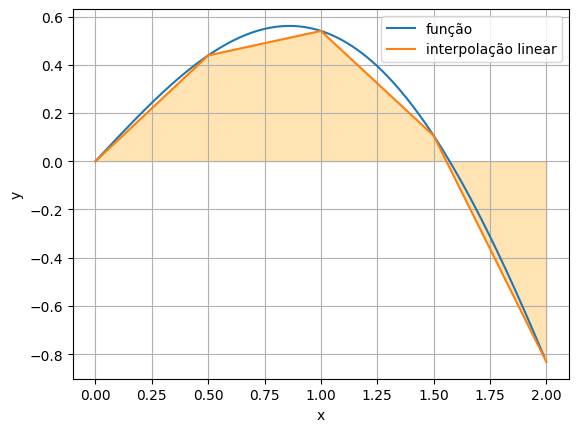

In [90]:
import numpy as np
from matplotlib import pyplot as pt


def f(x):
    return x * np.cos(x)


x = np.arange(0.0, 2.0, 0.01)
y = f(x)

# número de intervalos
n = 4

# np.linspace é parecido com np.arange, mas inclui o ponto final, e o terceiro
# argumento da função é o número de pontos, não o tamanho do intervalo
# repare que n+1 pontos corresponde a n intervalos!
xi = np.linspace(0, 2.0, n + 1)
yi = f(xi)
# jeito espertinho para plotar (precisa guardar cada ponto 2 vezes pra plotar
# a linha reta em cada intervalo).
xi2 = np.c_[xi, xi].flatten()[1:-1]
yi2 = np.c_[yi, yi].flatten()

pt.plot(x, f(x))
pt.plot(xi2, yi2[1:-1])
pt.fill_between(
    xi2, np.zeros(len(yi2) - 2), yi2[1:-1], color='orange', alpha=0.3
)
pt.grid()
pt.xlabel('x')
pt.ylabel('y')
pt.legend(['função', 'interpolação linear'])

#### Exercício 3

Vamos calcular a mesma integral do Ex. 2, agora pelo método do trapézio composto. Mais uma vez, tente variar o valor de $n$.

In [91]:
def f(x):
    return x * np.cos(x)


a = 0
b = 2

# número de intervalos
n = 9000

# dividimos o intervalo em n pedaços
xi = np.linspace(a, b, n + 1)
# calculamos os valores de f(x) em cada ponto
yi = f(xi)
# calculamos a integral
h = (b - a) / n
# tome cuidado com a soma: o primeiro e o último ponto são separados...
Itr = h * (0.5 * (f(a) + f(b)) + np.sum(yi))

print(f'Aproximação pela regra do trapézio composta: {Itr}')
print(f'Integral exata: {Iex}')   # copiar lá de cima

Aproximação pela regra do trapézio composta: 0.4022630496429502
Integral exata: 0.40244801710422107


#### Exercício 4

Agora vamos generalizar o exercício anterior, criando uma função `trapezio` que calcula a integral usando a regra do trapézio composta, dada uma função $f$, o intervalo $[a,b]$, e o número de sub-intervalos $n$.

In [92]:
def trapezio(f, a, b, n):
    xi = np.linspace(a, b, n + 1)
    yi = f(xi)
    h = (b - a) / n
    Itr = h * (0.5 * (f(a) + f(b)) + np.sum(yi))
    return Itr

In [93]:
# aplicando isto para uma outra função
def gaussiana(x):
    return 2 * np.exp(-(x**2)) / np.sqrt(np.pi)


I = trapezio(gaussiana, 0, 2, 10000)
print(f'Aproximação da integral de uma gaussiana: {I}')

from scipy.special import erf

print(f'Integral "exata": {erf(2)}')

Aproximação da integral de uma gaussiana: 0.995552073973883
Integral "exata": 0.9953222650189527


#### Exercício 5

Vamos calcular a mesma integral do Ex. 2, agora pelo método de Simpson composto. Mais uma vez, tente variar o valor de $n$.

### Regra de Simpson composta

Na regra de Simpson, usamos 3 pontos em cada intervalo: os 2 extremos e o ponto médio entre eles. Facilita um pouco a notação escrevermos os $x_i$ *incluindo os pontos médios*, ou seja, ao dividirmos o intervalo $[a; b]$ em $n$ sub-intervalos, teremos $2n+1$ pontos (como se tivéssemos dividido o intervalo em $2n$ partes). Assim, o primeiro sub-intervalo vai de $x_0$ a $x_2$, o segundo de $x_2$ a $x_4$ etc., e os pontos médios são $x_1,\ x_3,\ \ldots$, ou seja, os elementos de índice ímpar.

$$\begin{aligned}
\int_a^b f(x) dx &= \sum_{i=1}^{n} \int_{x_{2(i-1)}}^{x_{2i}} f(x) dx \\
& \approx \sum_{i=1}^n
\frac{x_{2i}-x_{2i-2}}{2}\left(\frac{1}{3}f(x_{2i-2}) + \frac{4}{3} f(x_{2i-1}) + \frac{1}{3} f(x_{2i})\right)\\
&= \frac{h}{2} \sum_{i=1}^n
\left(\frac{1}{3}f(x_{2i-2}) + \frac{4}{3} f(x_{2i-1}) + \frac{1}{3} f(x_{2i})\right)\\
& = \frac{h}{2} \left[ \frac{1}{3}(f(x_0) + f(x_{2n})) +  \frac{2}{3}\sum_{i=1}^{n-1} f(x_{2i}) + \frac{4}{3}\sum_{i=1}^{n-1} f(x_{2i-1}) \right] \\
& = \frac{h}{6} \left[ f(x_0) + f(x_{2n}) +  2 \sum_{i=1}^{n-1} f(x_{2i}) + 4\sum_{i=1}^{n-1} f(x_{2i-1}) \right]
\end{aligned}$$

onde $h = \frac{b-a}{n}$. Veja que, ao passarmos da terceira para a quarta linha, como no caso anterior, os pontos nos extremos dos intervalos (o primeiro e o terceiro termos dentro da somatória) são contados 2 vezes, e podemos juntá-los numa soma só, exceto pelo primeiro e o último. Os pontos médios, por outro lado, só aparecem uma vez. No último passo apenas fatoramos o $1/3$.

In [94]:
## DICA
# na somatória acima, pegamos os índices do vetor de 2 em 2
# isto pode ser feito facilmente em python
x = np.linspace(0, 5, 11)
print(x)
# um slice (recorte) do vetor era feito usando x[inicio:fim]
print(x[0:6])
# mas usando um segundo : você pode passar x[inicio:fim:passo]
print(x[0:6:2])
# você pode até deixar em branco o inicio, fim, ou ambos
print(x[::2])

# Pergunta: o que as linhas abaixo imprimem?
# (pense antes de descomentar e rodar)
# print(x[1::2])
# print(x[:-1:2])

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[0.  0.5 1.  1.5 2.  2.5]
[0. 1. 2.]
[0. 1. 2. 3. 4. 5.]


In [95]:
def f(x):
    return x * np.cos(x)


a = 0
b = 2

# número de intervalos
n = 10000

# dividimos o intervalo em ** 2n ** pedaços
xi = np.linspace(a, b, 2 * n + 1)
# print(xi)
# print(xi[1::2])
# print(xi[::2])
# print(np.sum(xi[::2]))
# print(np.sum(xi[1::2]))
# print(f(xi[::2]))
# print(np.sum(f(xi[::2])))
# calculamos os valores de f(x) em cada ponto
yi = f(xi)
# calculamos a integral
h = (b - a) / n
# tome cuidado com a soma: o primeiro e o último ponto são separados...
Isimp = (
    h
    / 6
    * (f(xi[0]) + f(xi[-1]) + 2 * np.sum(f(xi[1::2])) + 4 * np.sum(f(xi[::2])))
)

print(f'Aproximação pela regra de Simpson composta: {Isimp}')
print(f'Integral exata: {Iex}')   # copiar lá de cima

Aproximação pela regra de Simpson composta: 0.4023647823456754
Integral exata: 0.40244801710422107


#### Exercício 6

Finalmente, vamos generalizar o exercício anterior, criando uma função `simpson` que calcula a integral usando a regra de Simpson composta, dada uma função $f$, o intervalo $[a,b]$, e o número de sub-intervalos $n$.

In [96]:
def simpson(f, a, b, n):
    xi = np.linspace(a, b, 2 * n + 1)
    yi = f(xi)
    h = (b - a) / n
    Isimp = (
        h
        / 6
        * (
            f(xi[0])
            + f(xi[-1])
            + 2 * np.sum(f(xi[1::2]))
            + 4 * np.sum(f(xi[::2]))
        )
    )
    return Isimp

In [108]:
# aplicando isto para uma outra função
def gaussiana(x):
    return 2 * np.exp(-(x**2)) / np.sqrt(np.pi)


I = simpson(gaussiana, 0, 2, 100)
print(f'Aproximação da integral de uma gaussiana: {I}')

from scipy.special import erf

print(f'Integral "exata": {erf(2)}')

Aproximação da integral de uma gaussiana: 1.0068113488133155
Integral "exata": 0.9953222650189527


# Análise do erro

Podemos, a partir dos resultados sobre os erros dos polinômios interpoladores (e também dos polinômios de Taylor), estimar o erro cometido pela integração numérica.



## Regra do trapézio

Dada uma função $f$ definida no intervalo $[a;b]$, e tal que existe $f''$, o erro absoluto $\epsilon$ ao calcular $\int_a^b f(x) dx$ pela regra do trapézio é

$$ E_{abs} = |I_\text{exata} - I_\text{trapezio}| = \frac{(b-a)^3 f''(\xi)}{12} \leq \frac{(b-a)^3}{12} M$$

onde $\xi \in [a; b]$, e $M$ é o valor máximo do módulo da $f''$ no intervalo $[a;b]$, ou seja, $M = \max_{x\in[a;b]} |f''(x)|$.

### Trapézio composto

Ao usarmos o método do trapézio composto, podemos dividir o intervalo em pedaços menores, de tamanho $h = \frac{b-a}{n}$, mas acumularemos o erro de cada intervalo. Assim, teremos que o erro da integral $I_\text{TC}$ calculada usando trapézio composto fica:

$$ E_{abs} = |I_\text{exata} - I_\text{TC}| = n \frac{(b-a)^3 f''(\xi)}{12 n^3} \leq \frac{(b-a) h^2}{12} M$$



## Regra de Simpson

Dada uma função $f$ definida no intervalo $[a;b]$, e tal que existe $f^{(4)}$, o erro $\epsilon$ ao calcular $\int_a^b f(x) dx$ pela regra de Simpson é

$$ E_{abs} = |I_\text{exata} - I_\text{Simpson}| = \frac{h^5 f^{(4)}(\xi)}{90} \leq \frac{h^5}{90} M$$

onde $\xi \in [a; b]$, e $M$ é o valor máximo do módulo da $f^{(4)}$ no intervalo $[a;b]$, isto é, $M = \max_{x\in[a;b]} |f^{(4)}(x)|$.

### Regra de Simpson composta

Prosseguindo de forma análoga ao que fizemos antes, com o método de Simpson composto teremos que o erro da integral $I_\text{SC}$ fica:

$$ E_{abs} = |I_\text{exata} - I_\text{SC}| = n \frac{h^5 f^{(4)}(\xi)}{90} \leq \frac{(b-a) h^4}{180} M$$

Note que aqui definimos $h$ de forma diferente: tomamos $h$ como o intervalo entre 2 pontos calculados, o que pro método de Simpson equivale a $h = \frac{(b-a)}{2n}$, onde $n$ é o número de sub-intervalos.

Vamos integrar algumas funções e ver como os métodos se saem à medida que aumentamos o número de sub-intervalos $n$.


Text(0, 0.5, 'y')

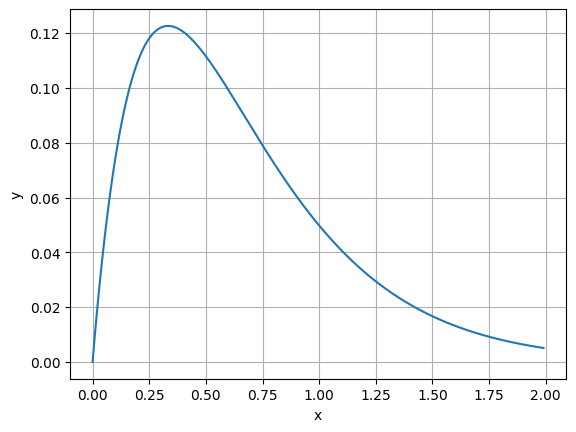

In [98]:
def f1(x):
    return x * np.exp(-3 * x)


a = 0
b = 2
x = np.arange(a, b, 0.01)
y = f1(x)

pt.plot(x, y)
pt.grid()
pt.xlabel('x')
pt.ylabel('y')

## Exercício 7

Vamos calcular numericamente a integral:

$$I = \int_{0}^2 x e^{-3x} $$

cuja solução exata é $\frac{-7e^{-6} + 1}{9}$. Usaremos o valor exato para calcular o erro absoluto $$\epsilon_n = |I_{\text{exato}} - I_{\text{numerico}}|$$ ao usarmos um método numérico com $n$ sub-intervalos.

1. Calcule numericamente essa integral usando a regra do trapézio composta, com $n$ indo de 2 até 20. Calcule o erro absoluto, usando o valor exato acima.
2. Faça o mesmo, mas usando a regra de Simpson composta.
3. Plote os erros absolutos dos 2 métodos acima em função de $n$.


In [117]:
# valor exato da integral
Iex = (-7 * np.exp(-6) + 1) / 9


def f(x):
    return x * np.exp(-3 * x)


a = 0
b = 2


# valores de n
ns = np.arange(2, 100000)
# vetor para guardar resultados
ErrosTrap = []
ErrosSimp = []

for n in ns:
    h = (b - a) / n
    # parte 1 - calcula a integral usando trapezio composta
    Itr = h * (0.5 * (f(a) + f(b)) + np.sum(yi))
    # calcula o erro absoluto
    Etr = np.abs(Iex - Itr)
    # parte 2 - calcula a integral usando Simpson composta
    Isimp = (
        h
        / 6
        * (
            f(xi[0])
            + f(xi[-1])
            + 2 * np.sum(f(xi[1::2]))
            + 4 * np.sum(f(xi[::2]))
        )
    )
    # calcula o erro absoluto
    Esimp = np.abs(Iex - Isimp)
    # guarda os valores para plotar depois
    ErrosTrap.append(Etr)
    ErrosSimp.append(Esimp)

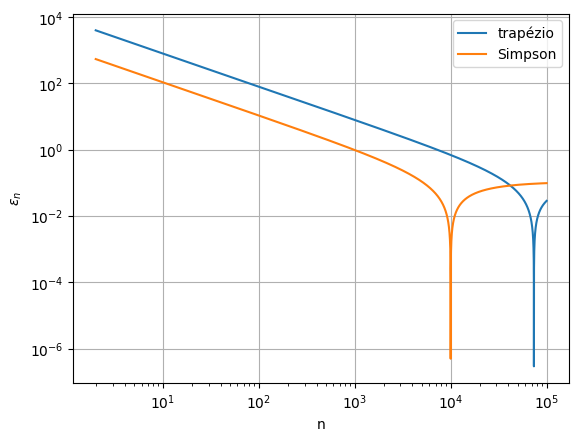

In [118]:
# plot
pt.plot(ns, ErrosTrap)
pt.plot(ns, ErrosSimp)
pt.grid()
pt.xlabel('n')
pt.ylabel('$\epsilon_n$')
pt.legend(['trapézio', 'Simpson'])
# escala log nos eixos pode ajudar?
pt.xscale('log')
pt.yscale('log')

## Exercício 8

Como o erro se comporta em função de $n$, para cada método? Isso é o esperado? Por quê?


O erro no método do trapézio converge em direção a zero da mesma forma que no método de simpson. O método de simpson começa com um erro mais próximo de zero, porém converge em ritmo parecido com o método do trapézio até que n chegue na proximidade de 10^4. Posteriormente, conforme N passa de 10^4, ambos métodos começam a aumentar o erro, um comportamento anormal.